In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import jupyter_compare_view

Jupyter compare_view v0.2.4


In [2]:
# https://stackoverflow.com/questions/7099290/how-to-ignore-hidden-files-using-os-listdir
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [10]:
# Feel free to edit as you like depending on where you put the files
BASE_IMAGE_DIR = "BERKELEY_RGBIRUV"
SAVE_DIR = f"{BASE_IMAGE_DIR}_ALIGNED"

os.makedirs(SAVE_DIR, exist_ok=True)

In [11]:
filePairs = []
numImages = 50 # Change this number

for idx in range(0, numImages):
    if os.path.isfile(f"{BASE_IMAGE_DIR}/{idx}_uv.jpg"):
        uv_vis_im = cv2.imread(f"{BASE_IMAGE_DIR}/{idx}_uv.jpg")
        ir_vis_im = cv2.imread(f"{BASE_IMAGE_DIR}/{idx}_ir.jpg")

        # Rescale
        assert uv_vis_im.shape[0] == ir_vis_im.shape[0] and uv_vis_im.shape[1] == ir_vis_im.shape[1]

        rescale_percent = 0.5
        width = int(uv_vis_im.shape[1] * rescale_percent)
        height = int(uv_vis_im.shape[0] * rescale_percent)
        dim = (width, height)

        # Resize both images
        uv_vis_im = cv2.resize(uv_vis_im, dim, interpolation = cv2.INTER_AREA)
        ir_vis_im = cv2.resize(ir_vis_im, dim, interpolation = cv2.INTER_AREA)

        # Split the side by side image into two halfs
        w = ir_vis_im.shape[1]//2
        im_ir = ir_vis_im[:, :w, :]
        im_vis = ir_vis_im[:, w:, :]
        im_uv = uv_vis_im[:, :w, :]

        cv2.imwrite(f"{SAVE_DIR}/{idx}_ir.jpg", im_ir)
        cv2.imwrite(f"{SAVE_DIR}/{idx}_vis.jpg", im_vis)
        cv2.imwrite(f"{SAVE_DIR}/{idx}_uv.jpg", im_uv)

        filePairs.append([f"{idx}_ir.jpg", f"{idx}_vis.jpg"]) # Subject, Template
        filePairs.append([f"{idx}_uv.jpg", f"{idx}_vis.jpg"]) # Subject, Template

# After done writing the individual images, write pairs.txt for SuperGlue
with open(f"{SAVE_DIR}/pairs.txt", "w") as f:
    for [vis, ir] in filePairs:
        f.write(f"{vis} {ir}\n")

Superglue Command

In [12]:
os.system(f"./align.sh {SAVE_DIR} {width//2} {height}")

Running SuperGlue on: BERKELEY_RGBIRUV_ALIGNED, resizing images to 2028 by 1520
Namespace(input_pairs='BERKELEY_RGBIRUV_ALIGNED/pairs.txt', input_dir='BERKELEY_RGBIRUV_ALIGNED', output_dir='BERKELEY_RGBIRUV_ALIGNED/superglue', max_length=-1, resize=[2028, 1520], resize_float=True, superglue='outdoor', max_keypoints=2048, keypoint_threshold=0.005, nms_radius=3, sinkhorn_iterations=20, match_threshold=0.2, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will resize to 2028x1520 (WxH)
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "BERKELEY_RGBIRUV_ALIGNED"
Will write matches to directory "BERKELEY_RGBIRUV_ALIGNED/superglue"
Will write visualization images to directory "BERKELEY_RGBIRUV_ALIGNED/superglue"
[Finished pair     0 of    78] load_image=0.040 matcher=18.392 viz_match=0.534 total=18.966 sec {0.1 FPS

[Finished pair    33 of    78] load_image=0.033 matcher=19.097 viz_match=0.631 total=19.761 sec {0.1 FPS} 
[Finished pair    34 of    78] load_image=0.033 matcher=18.972 viz_match=0.601 total=19.606 sec {0.1 FPS} 
[Finished pair    35 of    78] load_image=0.032 matcher=18.178 viz_match=0.559 total=18.769 sec {0.1 FPS} 
[Finished pair    36 of    78] load_image=0.033 matcher=17.819 viz_match=0.553 total=18.406 sec {0.1 FPS} 
[Finished pair    37 of    78] load_image=0.034 matcher=18.100 viz_match=0.570 total=18.705 sec {0.1 FPS} 
[Finished pair    38 of    78] load_image=0.033 matcher=18.205 viz_match=0.568 total=18.807 sec {0.1 FPS} 
[Finished pair    39 of    78] load_image=0.032 matcher=18.124 viz_match=0.653 total=18.809 sec {0.1 FPS} 
[Finished pair    40 of    78] load_image=0.035 matcher=20.841 viz_match=0.647 total=21.523 sec {0.0 FPS} 
[Finished pair    41 of    78] load_image=0.038 matcher=21.595 viz_match=0.645 total=22.277 sec {0.0 FPS} 
[Finished pair    42 of    78] load_i

[Finished pair    70 of    78] load_image=0.034 matcher=20.274 viz_match=0.587 total=20.895 sec {0.0 FPS} 
[Finished pair    71 of    78] load_image=0.034 matcher=20.370 viz_match=0.563 total=20.968 sec {0.0 FPS} 
[Finished pair    72 of    78] load_image=0.042 matcher=20.346 viz_match=0.557 total=20.945 sec {0.0 FPS} 
[Finished pair    73 of    78] load_image=0.041 matcher=20.689 viz_match=0.549 total=21.279 sec {0.0 FPS} 
[Finished pair    74 of    78] load_image=0.037 matcher=19.567 viz_match=0.543 total=20.148 sec {0.0 FPS} 
[Finished pair    75 of    78] load_image=0.035 matcher=19.766 viz_match=0.618 total=20.419 sec {0.0 FPS} 
[Finished pair    76 of    78] load_image=0.034 matcher=20.120 viz_match=0.597 total=20.752 sec {0.0 FPS} 
[Finished pair    77 of    78] load_image=0.034 matcher=19.530 viz_match=0.597 total=20.161 sec {0.0 FPS} 


0

In [14]:
def combine_vis_ir_uv(im_vis, im_ir, im_uv, H_ir, w_ir, h_ir, H_uv, w_uv, h_uv, save_dir, file_name):
    im_ir_aligned = cv2.warpPerspective(im_ir, H_ir, (w_ir, h_ir))
    im_uv_aligned = cv2.warpPerspective(im_uv, H_uv, (w_uv, h_uv))
    
    im_ir_aligned_grey = cv2.cvtColor(im_ir_aligned, cv2.COLOR_BGR2GRAY).reshape((im_vis.shape[0], im_vis.shape[1], 1))
    im_uv_aligned_grey = cv2.cvtColor(im_uv_aligned, cv2.COLOR_BGR2GRAY).reshape((im_vis.shape[0], im_vis.shape[1], 1))
    
    im_combined = np.concatenate((im_vis, im_ir_aligned_grey, im_uv_aligned_grey), axis=2)
    os.makedirs(save_dir, exist_ok=True)
    np.save(f"{save_dir}/{file_name}", im_combined)

In [19]:
for idx in range(0, numImages):
    # Do for IR
    if os.path.isfile(f"{BASE_IMAGE_DIR}/{idx}_uv.jpg"):
        im_vis = cv2.imread(f"{SAVE_DIR}/{idx}_vis.jpg")
        im_ir = cv2.imread(f"{SAVE_DIR}/{idx}_ir.jpg")

        ir_npz = np.load(f"{SAVE_DIR}/superglue/{idx}_ir_{idx}_vis_matches.npz")

        ir_best_idx = ir_npz['match_confidence'] > 0.85
        ir_best_kpt0 = ir_npz['keypoints0'][ir_best_idx]
        ir_best_kpt1 = []
        for i, index in enumerate(ir_best_idx):
            if index:
                assert ir_npz['matches'][i] != -1, "Index was not found in match"
                ir_best_kpt1.append(ir_npz['keypoints1'][ir_npz['matches'][i]])
        ir_best_kpt1 = np.array(ir_best_kpt1)

        if ir_best_kpt0.shape != ir_best_kpt1.shape:
            print(f"File: {idx} failed, shape {ir_best_kpt0.shape} is different from shape {ir_best_kpt1.shape}")
            continue

        if ir_best_kpt0.shape[0] <= 4:
            print(f"File: {idx} failed, does not have at least 4 points. It has {ir_best_kpt0.shape[0]} instead.")
            continue

        (H_ir, mask_ir) = cv2.findHomography(ir_best_kpt0, ir_best_kpt1, method=cv2.RANSAC)
        (h_ir, w_ir) = im_vis.shape[:2]


        # Do same for UV
        im_vis = cv2.imread(f"{SAVE_DIR}/{idx}_vis.jpg")
        im_uv = cv2.imread(f"{SAVE_DIR}/{idx}_uv.jpg")

        uv_npz = np.load(f"{SAVE_DIR}/superglue/{idx}_uv_{idx}_vis_matches.npz")

        uv_best_idx = uv_npz['match_confidence'] > 0.85
        uv_best_kpt0 = uv_npz['keypoints0'][uv_best_idx]
        uv_best_kpt1 = []
        for i, index in enumerate(uv_best_idx):
            if index:
                if uv_npz['matches'][i] == -1: 
                    print("Index was not found in match")
                uv_best_kpt1.append(uv_npz['keypoints1'][uv_npz['matches'][i]])
        uv_best_kpt1 = np.array(uv_best_kpt1)

        if uv_best_kpt0.shape != uv_best_kpt1.shape:
            print(f"File: {idx} failed, shape {uv_best_kpt0.shape} is different from shape {uv_best_kpt1.shape}")
            continue

        if uv_best_kpt0.shape[0] <= 4:
            print(f"File: {idx} failed, does not have at least 4 points. It has {uv_best_kpt0.shape[0]} instead.")
            continue

        (H_uv, mask_uv) = cv2.findHomography(uv_best_kpt0, uv_best_kpt1, method=cv2.RANSAC)
        (h_uv, w_uv) = im_vis.shape[:2]

        combine_vis_ir_uv(im_vis, im_ir, im_uv, H_ir, w_ir, h_ir, H_uv, w_uv, h_uv, f"{SAVE_DIR}/stacked/", f"{idx}_combined.npy")

File: 2 failed, shape (0, 2) is different from shape (0,)
File: 5 failed, shape (0, 2) is different from shape (0,)
File: 8 failed, shape (0, 2) is different from shape (0,)
File: 19 failed, does not have at least 4 points. It has 3 instead.
File: 21 failed, shape (0, 2) is different from shape (0,)
File: 22 failed, shape (0, 2) is different from shape (0,)
File: 23 failed, shape (0, 2) is different from shape (0,)
File: 26 failed, shape (0, 2) is different from shape (0,)
File: 34 failed, shape (0, 2) is different from shape (0,)
File: 36 failed, shape (0, 2) is different from shape (0,)
File: 42 failed, shape (0, 2) is different from shape (0,)
File: 43 failed, shape (0, 2) is different from shape (0,)
File: 45 failed, shape (0, 2) is different from shape (0,)
File: 46 failed, shape (0, 2) is different from shape (0,)
File: 47 failed, shape (0, 2) is different from shape (0,)
File: 49 failed, shape (0, 2) is different from shape (0,)



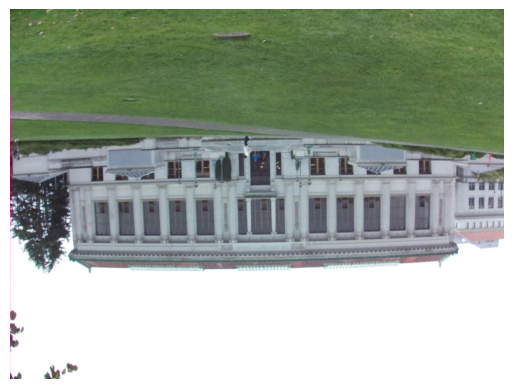
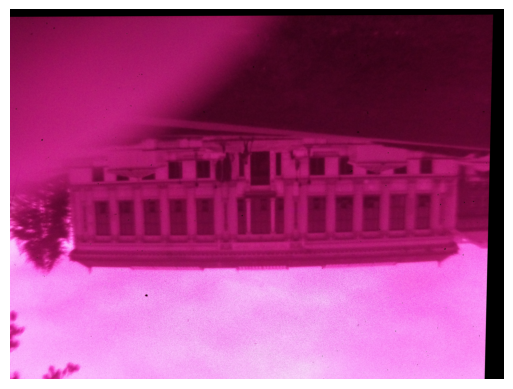

In [32]:
%%compare
fig, ax1 = plt.subplots()
ax1.axis("off")
ax1.imshow(cv2.cvtColor(im_vis, cv2.COLOR_BGR2RGB))

# Align and convert the image to RGB
fig, ax2 = plt.subplots()
ax2.axis("off")
aligned = cv2.warpPerspective(im_uv, H_uv, (w_uv, h_uv))
ax2.imshow(cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB))